# Simple LSTM

## 1) data 는 0 ~ 99 까지의 연속된 숫자이고, target 은 (1 ~ 101) * 2 으로 구성한다. 입력  data 에 대응하는 출력 data 를 예측하는 model 을 LSTM 으로 작성

## 연속된 5 개의 숫자를 보고 다음 숫자를 알아맞추도록 LSTM 을 이용한 model 작성

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

### Training Data 작성 요령

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
Numbers = [[i] for i in range(105)]
Numbers[:15]

[[0],
 [1],
 [2],
 [3],
 [4],
 [5],
 [6],
 [7],
 [8],
 [9],
 [10],
 [11],
 [12],
 [13],
 [14]]

In [4]:
Data = []
Target = []
for i in range(5, len(Numbers)):
    Data.append(Numbers[i-5: i])
    Target.append([Numbers[i][0] * 2])

print(Data[5])
print(Target[5])

[[5], [6], [7], [8], [9]]
[20]


In [5]:
# List --> numpy ndarray 변환
Data = np.array(Data)
Target = np.array(Target)

# Normalize
Data = Data / 100.
Target = Target / 100.

In [6]:
Data.shape

(100, 5, 1)

In [7]:
Target.shape

(100, 1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(Data, Target, test_size=0.2, random_state=0)

In [9]:
model = Sequential()
model.add(LSTM(16, input_shape=(5, 1)))
model.add(Dense(1))

In [10]:
model.compile(optimizer='adam', loss='mae', metrics=['mae'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 16)                1152      
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(X_train, y_train, epochs=500, validation_split=0.2)

Train on 64 samples, validate on 16 samples
Epoch 1/500
64/64 [==============================] - 4s 58ms/sample - loss: 1.1061 - mae: 1.1061 - val_loss: 1.2241 - val_mae: 1.2241
Epoch 2/500
64/64 [==============================] - 0s 516us/sample - loss: 1.0872 - mae: 1.0872 - val_loss: 1.2031 - val_mae: 1.2031
Epoch 3/500
64/64 [==============================] - 0s 438us/sample - loss: 1.0672 - mae: 1.0672 - val_loss: 1.1822 - val_mae: 1.1822
Epoch 4/500
64/64 [==============================] - 0s 469us/sample - loss: 1.0479 - mae: 1.0479 - val_loss: 1.1613 - val_mae: 1.1613
Epoch 5/500
64/64 [==============================] - 0s 469us/sample - loss: 1.0281 - mae: 1.0281 - val_loss: 1.1404 - val_mae: 1.1404
Epoch 6/500
64/64 [==============================] - 0s 469us/sample - loss: 1.0087 - mae: 1.0087 - val_loss: 1.1194 - val_mae: 1.1194
Epoch 7/500
64/64 [==============================] - 0s 406us/sample - loss: 0.9898 - mae: 0.9898 - val_loss: 1.0982 - val_mae: 1.0982
Epoch 8/500


Epoch 61/500
64/64 [==============================] - 0s 375us/sample - loss: 0.0773 - mae: 0.0773 - val_loss: 0.0605 - val_mae: 0.0605
Epoch 62/500
64/64 [==============================] - 0s 375us/sample - loss: 0.0697 - mae: 0.0697 - val_loss: 0.0535 - val_mae: 0.0535
Epoch 63/500
64/64 [==============================] - 0s 359us/sample - loss: 0.0613 - mae: 0.0613 - val_loss: 0.0469 - val_mae: 0.0469
Epoch 64/500
64/64 [==============================] - 0s 375us/sample - loss: 0.0532 - mae: 0.0532 - val_loss: 0.0418 - val_mae: 0.0418
Epoch 65/500
64/64 [==============================] - 0s 375us/sample - loss: 0.0448 - mae: 0.0448 - val_loss: 0.0348 - val_mae: 0.0348
Epoch 66/500
64/64 [==============================] - 0s 391us/sample - loss: 0.0369 - mae: 0.0369 - val_loss: 0.0252 - val_mae: 0.0252
Epoch 67/500
64/64 [==============================] - 0s 375us/sample - loss: 0.0282 - mae: 0.0282 - val_loss: 0.0195 - val_mae: 0.0195
Epoch 68/500
64/64 [============================

64/64 [==============================] - 0s 359us/sample - loss: 0.0169 - mae: 0.0169 - val_loss: 0.0137 - val_mae: 0.0137
Epoch 122/500
64/64 [==============================] - 0s 359us/sample - loss: 0.0171 - mae: 0.0171 - val_loss: 0.0142 - val_mae: 0.0142
Epoch 123/500
64/64 [==============================] - 0s 375us/sample - loss: 0.0171 - mae: 0.0171 - val_loss: 0.0137 - val_mae: 0.0137
Epoch 124/500
64/64 [==============================] - 0s 391us/sample - loss: 0.0168 - mae: 0.0168 - val_loss: 0.0136 - val_mae: 0.0136
Epoch 125/500
64/64 [==============================] - 0s 375us/sample - loss: 0.0173 - mae: 0.0173 - val_loss: 0.0135 - val_mae: 0.0135
Epoch 126/500
64/64 [==============================] - 0s 422us/sample - loss: 0.0169 - mae: 0.0169 - val_loss: 0.0141 - val_mae: 0.0141
Epoch 127/500
64/64 [==============================] - 0s 375us/sample - loss: 0.0170 - mae: 0.0170 - val_loss: 0.0139 - val_mae: 0.0139
Epoch 128/500
64/64 [==============================] - 

Epoch 181/500
64/64 [==============================] - 0s 359us/sample - loss: 0.0151 - mae: 0.0151 - val_loss: 0.0121 - val_mae: 0.0121
Epoch 182/500
64/64 [==============================] - 0s 391us/sample - loss: 0.0153 - mae: 0.0153 - val_loss: 0.0127 - val_mae: 0.0127
Epoch 183/500
64/64 [==============================] - 0s 375us/sample - loss: 0.0150 - mae: 0.0150 - val_loss: 0.0121 - val_mae: 0.0121
Epoch 184/500
64/64 [==============================] - 0s 375us/sample - loss: 0.0150 - mae: 0.0150 - val_loss: 0.0121 - val_mae: 0.0121
Epoch 185/500
64/64 [==============================] - 0s 375us/sample - loss: 0.0153 - mae: 0.0153 - val_loss: 0.0125 - val_mae: 0.0125
Epoch 186/500
64/64 [==============================] - 0s 375us/sample - loss: 0.0150 - mae: 0.0150 - val_loss: 0.0124 - val_mae: 0.0124
Epoch 187/500
64/64 [==============================] - 0s 359us/sample - loss: 0.0149 - mae: 0.0149 - val_loss: 0.0121 - val_mae: 0.0121
Epoch 188/500
64/64 [====================

Epoch 241/500
64/64 [==============================] - 0s 609us/sample - loss: 0.0135 - mae: 0.0135 - val_loss: 0.0107 - val_mae: 0.0107
Epoch 242/500
64/64 [==============================] - 0s 359us/sample - loss: 0.0135 - mae: 0.0135 - val_loss: 0.0109 - val_mae: 0.0109
Epoch 243/500
64/64 [==============================] - 0s 359us/sample - loss: 0.0136 - mae: 0.0136 - val_loss: 0.0111 - val_mae: 0.0111
Epoch 244/500
64/64 [==============================] - 0s 391us/sample - loss: 0.0131 - mae: 0.0131 - val_loss: 0.0108 - val_mae: 0.0108
Epoch 245/500
64/64 [==============================] - 0s 375us/sample - loss: 0.0131 - mae: 0.0131 - val_loss: 0.0106 - val_mae: 0.0106
Epoch 246/500
64/64 [==============================] - 0s 391us/sample - loss: 0.0130 - mae: 0.0130 - val_loss: 0.0106 - val_mae: 0.0106
Epoch 247/500
64/64 [==============================] - 0s 375us/sample - loss: 0.0130 - mae: 0.0130 - val_loss: 0.0111 - val_mae: 0.0111
Epoch 248/500
64/64 [====================

Epoch 301/500
64/64 [==============================] - 0s 375us/sample - loss: 0.0117 - mae: 0.0117 - val_loss: 0.0100 - val_mae: 0.0100
Epoch 302/500
64/64 [==============================] - 0s 391us/sample - loss: 0.0117 - mae: 0.0117 - val_loss: 0.0094 - val_mae: 0.0094
Epoch 303/500
64/64 [==============================] - 0s 422us/sample - loss: 0.0116 - mae: 0.0116 - val_loss: 0.0096 - val_mae: 0.0096
Epoch 304/500
64/64 [==============================] - 0s 360us/sample - loss: 0.0117 - mae: 0.0117 - val_loss: 0.0098 - val_mae: 0.0098
Epoch 305/500
64/64 [==============================] - 0s 375us/sample - loss: 0.0121 - mae: 0.0121 - val_loss: 0.0098 - val_mae: 0.0098
Epoch 306/500
64/64 [==============================] - 0s 406us/sample - loss: 0.0116 - mae: 0.0116 - val_loss: 0.0098 - val_mae: 0.0098
Epoch 307/500
64/64 [==============================] - 0s 375us/sample - loss: 0.0122 - mae: 0.0122 - val_loss: 0.0092 - val_mae: 0.0092
Epoch 308/500
64/64 [====================

Epoch 361/500
64/64 [==============================] - 0s 359us/sample - loss: 0.0105 - mae: 0.0105 - val_loss: 0.0090 - val_mae: 0.0090
Epoch 362/500
64/64 [==============================] - 0s 359us/sample - loss: 0.0104 - mae: 0.0104 - val_loss: 0.0084 - val_mae: 0.0084
Epoch 363/500
64/64 [==============================] - 0s 375us/sample - loss: 0.0106 - mae: 0.0106 - val_loss: 0.0082 - val_mae: 0.0082
Epoch 364/500
64/64 [==============================] - 0s 359us/sample - loss: 0.0102 - mae: 0.0102 - val_loss: 0.0090 - val_mae: 0.0090
Epoch 365/500
64/64 [==============================] - 0s 391us/sample - loss: 0.0106 - mae: 0.0106 - val_loss: 0.0085 - val_mae: 0.0085
Epoch 366/500
64/64 [==============================] - 0s 359us/sample - loss: 0.0106 - mae: 0.0106 - val_loss: 0.0089 - val_mae: 0.0089
Epoch 367/500
64/64 [==============================] - 0s 359us/sample - loss: 0.0108 - mae: 0.0108 - val_loss: 0.0087 - val_mae: 0.0087
Epoch 368/500
64/64 [====================

Epoch 480/500
64/64 [==============================] - 0s 391us/sample - loss: 0.0086 - mae: 0.0086 - val_loss: 0.0062 - val_mae: 0.0062
Epoch 481/500
64/64 [==============================] - 0s 344us/sample - loss: 0.0080 - mae: 0.0080 - val_loss: 0.0066 - val_mae: 0.0066
Epoch 482/500
64/64 [==============================] - 0s 375us/sample - loss: 0.0081 - mae: 0.0081 - val_loss: 0.0067 - val_mae: 0.0067
Epoch 483/500
64/64 [==============================] - 0s 359us/sample - loss: 0.0085 - mae: 0.0085 - val_loss: 0.0062 - val_mae: 0.0062
Epoch 484/500
64/64 [==============================] - 0s 406us/sample - loss: 0.0079 - mae: 0.0079 - val_loss: 0.0067 - val_mae: 0.0067
Epoch 485/500
64/64 [==============================] - 0s 359us/sample - loss: 0.0081 - mae: 0.0081 - val_loss: 0.0067 - val_mae: 0.0067
Epoch 486/500
64/64 [==============================] - 0s 375us/sample - loss: 0.0086 - mae: 0.0086 - val_loss: 0.0061 - val_mae: 0.0061
Epoch 487/500
64/64 [====================

In [13]:
result = model.predict(X_test)

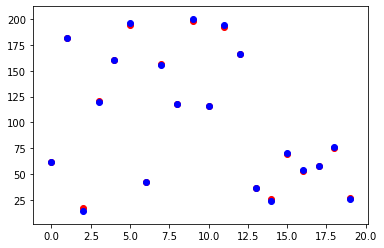

In [14]:
plt.scatter(np.arange(len(result)), result * 100, c='r')
plt.scatter(np.arange(len(result)), y_test * 100, c='b')

In [15]:
test_data = [[35], [36], [37], [38], [39]]

x = np.array(test_data) / 100.

model.predict(x.reshape(1, 5, 1)) * 100

array([[79.24305]], dtype=float32)